<a href="https://colab.research.google.com/github/dmesac-unal/MetNumUn20231/blob/main/Lab2/dmesac_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U fortran-magic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline

%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

/usr/local/lib/python3.8/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'David': 'Hume',
 'Immanuel': 'Kant',
 'Bertrand': 'Russell',
 'Ludwig': 'Wittgenstein'}

In [ ]:
del philosophers['David']
philosophers

{'Immanuel': 'Kant', 'Bertrand': 'Russell', 'Ludwig': 'Wittgenstein'}

In [ ]:
# No slicing.
#philosophers['Bertrand':'Immanuel']

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 85 µs, sys: 10 µs, total: 95 µs
Wall time: 125 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

**My own example 0 - cpu info**

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.158
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed
bogomips	: 4400.31
clflush size	: 64
cache_alignment	: 64
addres

**My own example 1 - Changing in matmul(A, B) Python len(B) (# of rows of B) for len(A[0]) (# of columns of A)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(B)
    cols_out = len(A[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

**My own example 2 - Verifiying error with in matmul(A, B) Python with the original matrices when changing len(B) (# of rows of B) for len(A[0]) (# of colums of A)**

In [ ]:
matmul(a, b)

[[5, 8, 11], [8, 13, 18]]

**My own example 3 - Chekcing the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(B)
    cols_out = len(A[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    if (len(A[0]) == len(B)):
     for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
     return out 
    else:
      return("No es compatible");

**My own example 4 -  Verifiying error with in matmul(A, B) Python when checking the mtarix multiplication compatibility condition  len(A[0]) == len(B)**

In [ ]:
matmul(a, b)

'No es compatible'

**My own example 5 - Deifining A and B that are compatible for multiplcation**

In [ ]:
a1= [[1, 2],
     [2, 3]]

b1= [[3, 2],
     [2, 3]]

**My own example 6 - Runinng the correct Python matrix multiplication code with the matrices with dimensions compatible for multiplication.**

In [ ]:
matmul(a1, b1)

[[7, 8], [12, 13]]

In [ ]:
import random

In [ ]:
random.normalvariate(0,1)

0.13770894621085605

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.5330779155579448, 0.6560596856464515, 0.42293435291763437],
 [0.6561886512702217, 0.03559677131378458, 0.14576908558378476]]

**My own example 7 - Running 10 times matmul(randa, randb) with randa and randb a randon matrices of 600 x 100 and 100 x 600 and calulating the average execution time**

In [ ]:
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)

In [ ]:
from timeit import default_timer
#declaracion de arreglo contenedor de los tiempos de ejecucion
tiempos_de_ejecucion = []

n=10
while n>0:
  #creacion de matrices aleatorias
  randa = random_matrix(600, 100)
  randb = random_matrix(100, 600) 
  #calculo del tiempo de ejecucion
  inicio=default_timer()
  matmul(randa,randb)
  fin=default_timer()
  n = n-1
  #captura del tiempo de ejecucion
  tiempos_de_ejecucion.append(fin-inicio)

#calculamos el promedio
sumaElementos = sum(tiempos_de_ejecucion)
print("el promedio de los tiempos de ejecucion es: ",(sumaElementos)/10)

el promedio de los tiempos de ejecucion es:  0.2552720239000109


**My own example 8 - Creating the average execution time data frame and adding Python's average execution time**

In [ ]:
#creamos el dataframe apartir de un objeto que guarda los tiempos de ejecucion y las repeticiones 

import pandas as pd

datos = {"Tiempos de ejecución": tiempos_de_ejecucion, "repeticion": [1,2,3,4,5,6,7,8,9,10]}

df = pd.DataFrame(datos)

print(df)

   Tiempos de ejecución  repeticion
0              0.259819           1
1              0.260433           2
2              0.248644           3
3              0.280057           4
4              0.251039           5
5              0.248775           6
6              0.263120           7
7              0.255454           8
8              0.249047           9
9              0.236334          10


**My own example 9 - Running 10 times randa and randb mutiplicaction as NumPy arrays  adding NumPy's average execution time**

In [ ]:
import random
import numpy as np

# redefinimos la funcion de matrices aleatorias de numpy
def matriz_np_random(m, n):
    matriz_aleatoria = np.random.rand(m, n)
    return matriz_aleatoria


In [ ]:
from timeit import default_timer
import numpy as np
#declaracion de arreglo contenedor de los tiempos de ejecucion
tiempos_de_ejecucion_numpy = []

n=10
while n>0:
  #creacion de matrices aleatorias
  randa = matriz_np_random(600, 100)
  randb = matriz_np_random(100, 600) 
  #calculo del tiempo de ejecucion
  inicio=default_timer()
  np.dot(randa,randb)
  fin=default_timer()
  n = n-1
  #captura del tiempo de ejecucion
  tiempos_de_ejecucion_numpy.append(fin-inicio)

#calculamos el promedio
sumaElementos = sum(tiempos_de_ejecucion_numpy)
print("el promedio de los tiempos de ejecucion para matrices de numpy es: ",(sumaElementos)/10)

el promedio de los tiempos de ejecucion para matrices de numpy es:  0.003097718799995164


In [ ]:
#creamos el dataframe apartir de un objeto que guarda los tiempos de ejecucion y las repeticiones para matrices numpy

import pandas as pd

datos = {"Tiempos de ejecución": tiempos_de_ejecucion_numpy, "repeticion": [1,2,3,4,5,6,7,8,9,10]}

df = pd.DataFrame(datos)

print(df)

   Tiempos de ejecución  repeticion
0              0.005431           1
1              0.003945           2
2              0.002341           3
3              0.002670           4
4              0.002361           5
5              0.004464           6
6              0.002762           7
7              0.002313           8
8              0.002366           9
9              0.002325          10


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 78.4 ms, sys: 34 µs, total: 78.5 ms
Wall time: 89.2 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 247 µs, sys: 0 ns, total: 247 µs
Wall time: 257 µs


333328333350000.0

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


**My own example 10 - Deifining A (2x2)  and B (2x2)**

In [ ]:
A= [[1, 2],
     [2, 3]]

B= [[3, 2],
     [2, 3]]

**My own example 11 - Defining Fortran subroutine matmul(A,B) for 2x2 matrices**

In [ ]:
%%fortran
subroutine matmul(A,B,C)
  real,intent(in) :: A(2,2), B(2,2)
  real,intent(out) :: C(2,2)
  integer :: i,j,k

  do i = 1, 2
     do j = 1, 2
        C(i,j) = 0.0
        do k = 1, 2
           C(i,j) = C(i,j) + A(i,k) * B(k,j)
        end do
     end do
  end do

end subroutine matmul

**My own example 12 -Run Fortran subroutine matmul(A,B) with a and b 2x2 matrices**

In [ ]:
A = np.random.rand(2,2)
B = np.random.rand(2,2)

C = matmul(A,B)
print(C)

[[0.31658012 0.3629366 ]
 [1.0166581  0.94381636]]


**My own example 13 - Defining Fortran subroutine matmul(A,B) for 600x100 and 100x600 matrices**

In [ ]:
%%fortran
subroutine matmul(A,B,C)
  real,intent(in):: A(600,100), B(100,600)
  real,intent(out):: C(600,600)
  integer :: i,j,k

  C= 0.0

  do i = 1, 600
     do j = 1, 600
        C(i,j) = 0.0
        do k = 1, 100
           C(i,j) = C(i,j) + A(i,k) * B(k,j)
        end do
     end do
  end do

end subroutine matmul


**My own example 14 -Run Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices**

In [ ]:

A = np.random.rand(600,100)
B = np.random.rand(100,600)


C = matmul(A,B)
print(C)

[[24.082293 25.872873 26.123701 ... 26.072937 24.817242 25.891184]
 [23.158531 26.500381 25.997126 ... 24.768    23.935572 25.592327]
 [25.885746 27.099733 27.382168 ... 27.151888 27.219946 26.342796]
 ...
 [24.343248 24.739643 25.882023 ... 25.239346 25.123596 26.49197 ]
 [23.382658 25.98115  27.881939 ... 27.569263 26.40024  25.729052]
 [25.952986 26.743336 26.223307 ... 26.502588 27.540157 30.14605 ]]


**My own example 15 - Running 10 times the  Fortran subroutine matmul(A,B) with 600x100 and 100x600 matrices and adding Fortran magic average execution time to the data frame**

In [ ]:
from timeit import default_timer
import numpy as np
#declaracion de arreglo contenedor de los tiempos de ejecucion
tiempos_de_ejecucion_numpy = []

n=10
while n>0:
  #creacion de matrices aleatorias
  randa = matriz_np_random(600, 100)
  randb = matriz_np_random(100, 600) 
  #calculo del tiempo de ejecucion
  inicio=default_timer()
  matmul(A,B)
  fin=default_timer()
  n = n-1
  #captura del tiempo de ejecucion
  tiempos_de_ejecucion_numpy.append(fin-inicio)

#calculamos el promedio
sumaElementos = sum(tiempos_de_ejecucion_numpy)
print("el promedio de los tiempos de ejecucion para matrices de Fortran es: ",(sumaElementos)/10)


el promedio de los tiempos de ejecucion para matrices de Fortran es:  0.045615511199991944


**My own example 16 - Creating a  Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%fortran

  
subroutine matmul(A,B,C)

    INTEGER :: i, j, k, m
    REAL,intent(in) :: A(600, 100), B(100, 600)
    REAL,intent(out) ::  C(600, 600)
    

    
    ! Multiply matrices A and B
    DO m = 1, 10
        DO i = 1, 600
            DO j = 1, 600
                C(i,j) = 0.0
                DO k = 1, 100
                    C(i,j) = C(i,j) + A(i,k) * B(k,j)
                    
                END DO
            END DO
        END DO
        
        ! Set matrix C to the result of the multiplication
        C = C
        
    END DO
    
END subroutine matmul


**My own example 17 - Running the Fortran program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
A = np.random.rand(600,100)
B = np.random.rand(100,600)



C= matmul(A,B)
print(C)

[[22.87273  24.035824 22.695953 ... 22.622145 23.555891 23.178764]
 [24.046484 27.108198 22.503325 ... 23.566998 23.48442  24.701515]
 [21.128597 24.350006 20.785952 ... 22.067913 22.297405 22.612875]
 ...
 [23.331741 25.740957 21.413866 ... 22.036339 22.47213  22.230768]
 [23.626387 24.39897  24.386175 ... 25.012741 22.98816  22.525059]
 [24.011665 27.49458  25.386559 ... 27.187525 23.721235 24.167557]]


**My own example 18 - Adding Fortran average execution time to the data frame**

In [ ]:
from timeit import default_timer
import numpy as np
#declaracion de arreglo contenedor de los tiempos de ejecucion
tiempos_de_ejecucion_numpy = []

n=10
while n>0:
  #creacion de matrices aleatorias
  randa = matriz_np_random(600, 100)
  randb = matriz_np_random(100, 600) 
  #calculo del tiempo de ejecucion
  inicio=default_timer()
  matmul(A,B)
  fin=default_timer()
  n = n-1
  #captura del tiempo de ejecucion
  tiempos_de_ejecucion_numpy.append(fin-inicio)

#calculamos el promedio
sumaElementos = sum(tiempos_de_ejecucion_numpy)
print("el promedio de los tiempos de ejecucion para matrices de Fortran es: ",(sumaElementos)/10)


el promedio de los tiempos de ejecucion para matrices de Fortran es:  0.44255089660001656


**My own example 19 - Creating a c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matriz.c
#include <stdio.h>

#define ROW_A 600
#define COL_A 100
#define ROW_B 100
#define COL_B 600

void multiply_matrices(int A[][COL_A], int B[][COL_B], int C[][COL_B]);

int main()
{
    int A[ROW_A][COL_A], B[ROW_B][COL_B], C[ROW_A][COL_B];
    int i, j, k;
    
    // Initialize matrices A and B with random values
    for (i = 0; i < ROW_A; i++) {
        for (j = 0; j < COL_A; j++) {
            A[i][j] = rand() % 10;
        }
    }
    
    for (i = 0; i < ROW_B; i++) {
        for (j = 0; j < COL_B; j++) {
            B[i][j] = rand() % 10;
        }
    }
    
    // Multiply matrices A and B 10 times
    for (k = 0; k < 10; k++) {
        multiply_matrices(A, B, C);
    }
    
    // Print the result matrix C
    printf("Result matrix:\n");
    for (i = 0; i < ROW_A; i++) {
        for (j = 0; j < COL_B; j++) {
            printf("%d ", C[i][j]);
        }
        printf("\n");
    }
    
    return 0;
}

void multiply_matrices(int A[][COL_A], int B[][COL_B], int C[][COL_B])
{
    int i, j, k;
    
    // Initialize all elements of matrix C to 0
    for (i = 0; i < ROW_A; i++) {
        for (j = 0; j < COL_B; j++) {
            C[i][j] = 0;
        }
    }
    
    // Multiply matrices A and B and store the result in matrix C
    for (i = 0; i < ROW_A; i++) {
        for (j = 0; j < COL_B; j++) {
            for (k = 0; k < ROW_B; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}


Writing matriz.c


**My own example 20 - Running the c program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%shell
gcc matriz.c -o output
./output

matriz.c: In function ‘main’:
matriz.c:18:23: warning: implicit declaration of function ‘rand’ [-Wimplicit-function-declaration]
   18 |             A[i][j] = rand() % 10;
      |                       ^~~~
Result matrix:
2076 2294 2340 2025 2268 2299 2214 2344 1789 2263 1844 2007 1942 2239 2023 2033 1991 1779 2014 1991 2221 2187 1936 2158 2114 1887 1983 2086 2085 2131 2193 2141 1891 1967 1960 2016 2100 1816 2119 2130 2054 2262 2321 2135 2101 2214 2077 2075 1953 2093 2375 2064 2316 1892 1885 1762 2055 1998 1903 1876 1850 2109 1894 2049 2174 2277 2015 2246 2331 2289 2190 1853 1928 2214 2063 2495 2114 2020 1955 2174 1991 1803 1990 1970 1866 1896 2085 1858 2027 2103 2163 2006 2043 2175 2163 1867 2084 2284 2051 2219 2192 2116 2164 2006 1943 2257 2155 2076 1974 2040 2177 2110 2309 2075 2077 2050 2181 2433 2403 2045 2048 2391 2022 2268 2036 2039 2247 2098 1884 2205 1833 2150 1862 2093 2095 2035 1902 1979 1837 2042 2364 1766 1993 2101 2273 2088 1813 1901 2354 2016 1968 2293 2334 2028 2083 202

**My own example 21 - Adding c average execution time to the data frame**

In [ ]:
%%writefile MATRIX.c
#include <stdio.h>
#include <stdlib.h>
#include <time.h>

#define ROW_A 600
#define COL_A 100
#define ROW_B 100
#define COL_B 600

double get_execution_time(struct timespec start_time, struct timespec end_time) {
    double start_ns = (double) start_time.tv_sec * 1e9 + (double) start_time.tv_nsec;
    double end_ns = (double) end_time.tv_sec * 1e9 + (double) end_time.tv_nsec;
    return (end_ns - start_ns) / 1e9;
}

int main() {
    double avg_time = 0.0;
    int i, j, k, n;
    struct timespec start_time, end_time;

    int A[ROW_A][COL_A];
    int B[ROW_B][COL_B];
    int C[ROW_A][COL_B];

    // initialize matrices A and B with random values
    for (i = 0; i < ROW_A; i++) {
        for (j = 0; j < COL_A; j++) {
            A[i][j] = rand() % 10;
        }
    }

    for (i = 0; i < ROW_B; i++) {
        for (j = 0; j < COL_B; j++) {
            B[i][j] = rand() % 10;
        }
    }

    // multiply matrices A and B 10 times and calculate average execution time
    for (n = 0; n < 10; n++) {
        clock_gettime(CLOCK_REALTIME, &start_time);

        for (i = 0; i < ROW_A; i++) {
            for (j = 0; j < COL_B; j++) {
                C[i][j] = 0;
                for (k = 0; k < COL_A; k++) {
                    C[i][j] += A[i][k] * B[k][j];
                }
            }
        }

        clock_gettime(CLOCK_REALTIME, &end_time);

        double elapsed_time = get_execution_time(start_time, end_time);
        printf("Execution time for iteration %d: %lf seconds\n", n + 1, elapsed_time);

        avg_time += elapsed_time;
    }

    avg_time /= 10.0;
    printf("Average execution time: %lf seconds\n", avg_time);

    return 0;
}


Writing MATRIX.c


In [ ]:
%%shell
gcc MATRIX.c -o output0
./output0

Execution time for iteration 1: 0.360780 seconds
Execution time for iteration 2: 0.323825 seconds
Execution time for iteration 3: 0.322607 seconds
Execution time for iteration 4: 0.296027 seconds
Execution time for iteration 5: 0.294977 seconds
Execution time for iteration 6: 0.301623 seconds
Execution time for iteration 7: 0.316106 seconds
Execution time for iteration 8: 0.306767 seconds
Execution time for iteration 9: 0.292261 seconds
Execution time for iteration 10: 0.290277 seconds
Average execution time: 0.310525 seconds


**My own example 22 - Creating a C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [ ]:
!pip install git+https://github.com/andreinechaev/nvcc4jupyter.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/andreinechaev/nvcc4jupyter.git to /tmp/pip-req-build-nxqq9uv8
  Running command git clone --filter=blob:none --quiet https://github.com/andreinechaev/nvcc4jupyter.git /tmp/pip-req-build-nxqq9uv8
  Resolved https://github.com/andreinechaev/nvcc4jupyter.git to commit aac710a35f52bb78ab34d2e52517237941399eff
  Preparing metadata (setup.py) ... done
  Created wheel for NVCCPlugin: filename=NVCCPlugin-0.0.2-py3-none-any.whl size=4304 sha256=d213df73835354e277efb978b54f898237e82cd7a0cd66c62d57d3ba86f373d4
  Stored in directory: /tmp/pip-ephem-wheel-cache-ayzslbiy/wheels/f3/08/cc/e2b5b0e1c92df07dbb50a6f024a68ce090f5e7b2316b41756d
Successfully built NVCCPlugin


In [ ]:
%load_ext nvcc_plugin

created output directory at /content/src
Out bin /content/result.out


In [ ]:
%%time
%%cu
#include <iostream>
#include <cstdlib>
#include <ctime>

using namespace std;

const int ROWS_Prim = 100;
const int COLS_Prim = 600;
const int ROWS_Sec = 600;
const int COLS_Sec = 100;

int matrices_cpp()
{
    int Prim[ROWS_Prim][COLS_Prim];
    int Sec[ROWS_Sec][COLS_Sec];
    int Ter[ROWS_Prim][COLS_Sec];

    // Hacer uso del siguiente comando que nos permite generar valores de forma aleatoria 
    srand(time(NULL));

    // Generar contenido en la matriz "Prim" haciendo uso del comando anterior
    for (int i = 0; i < ROWS_Prim; i++) {
        for (int j = 0; j < COLS_Prim; j++) {
            Prim[i][j] = rand() % 100;
        }
    }

    // Generar contenido en la matriz "Sec" de la misma manera
    for (int i = 0; i < ROWS_Sec; i++) {
        for (int j = 0; j < COLS_Sec; j++) {
            Sec[i][j] = rand() % 100;
        }
    }

    // Generar el prducto de "Prim" con "Sec" e insertarlo en "Ter"
    for (int i = 0; i < ROWS_Prim; i++) {
        for (int j = 0; j < COLS_Sec; j++) {
            Ter[i][j] = 0;
            for (int k = 0; k < COLS_Prim; k++) {
                Ter[i][j] += Prim[i][k] * Sec[k][j];
            }
        }
    }

    

    return 0;
}

int main()
{
    matrices_cpp();

    return 0;
}


CPU times: user 34.2 ms, sys: 18.2 ms, total: 52.4 ms
Wall time: 3.17 s


**My own example 23 - Running the C++ program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%cu

#include <iostream>
#include <cstdlib>
#include <ctime>
#include <chrono>
#include <fstream>


using namespace std;

const int ROWS_Prim = 100;
const int COLS_Prim = 600;
const int ROWS_Sec = 600;
const int COLS_Sec = 100;

void matrices_cpp()
{
    int Prim[ROWS_Prim][COLS_Prim];
    int Sec[ROWS_Sec][COLS_Sec];
    int Ter[ROWS_Prim][COLS_Sec];

  // Hacer uso del siguiente comando que nos permite generar valores de forma aleatoria 
    srand(time(NULL));

    // Generar contenido en la matriz "Prim" haciendo uso del comando anterior
    for (int i = 0; i < ROWS_Prim; i++) {
        for (int j = 0; j < COLS_Prim; j++) {
            Prim[i][j] = rand() % 100;
        }
    }

    // Generar contenido en la matriz "Sec" de la misma manera
    for (int i = 0; i < ROWS_Sec; i++) {
        for (int j = 0; j < COLS_Sec; j++) {
            Sec[i][j] = rand() % 100;
        }
    }

    // Generar el prducto de "Prim" con "Sec" e insertarlo en "Ter"
    for (int i = 0; i < ROWS_Prim; i++) {
        for (int j = 0; j < COLS_Sec; j++) {
            Ter[i][j] = 0;
            for (int k = 0; k < COLS_Prim; k++) {
                Ter[i][j] += Prim[i][k] * Sec[k][j];
            }
        }
    }
}

int main()

{
    int Num_iteraciones = 15;
    double duracion[Num_iteraciones];

    for (int i = 0; i < Num_iteraciones; i++) {
        auto start = chrono::high_resolution_clock::now();
        matrices_cpp();
        auto end = chrono::high_resolution_clock::now();
        double Duracion = chrono::duration_cast<chrono::milliseconds>(end - start).count();
        duracion[i] = Duracion;
    }

    // Promedio de los intervalos de tiempo
    double promedio_Duracion = 0.0;
    for (int i = 0; i < Num_iteraciones; i++) {
        promedio_Duracion += duracion[i];
    }
    promedio_Duracion /= Num_iteraciones;

    // Expresar los resultados obtenidos
    cout << "Intervalos de tiempo para ejecutar:" << endl;
    for (int i = 0; i < Num_iteraciones; i++) {
        cout << "Iteracion " << i+1 << ": " << duracion[i] << " ms" << endl;
    }
    cout << "Promedio obtenido: " << promedio_Duracion << " ms" << endl;
 
     std::ofstream outfile("/content/data/data.txt");

      // Escribir la variable en el archivo
      outfile << promedio_Duracion;

      // Cerrar el archivo
      outfile.close();
     

   
    return 0;
}

Intervalos de tiempo para ejecutar:
Iteracion 1: 130 ms
Iteracion 2: 73 ms
Iteracion 3: 68 ms
Iteracion 4: 66 ms
Iteracion 5: 71 ms
Iteracion 6: 82 ms
Iteracion 7: 76 ms
Iteracion 8: 67 ms
Iteracion 9: 72 ms
Iteracion 10: 66 ms
Iteracion 11: 66 ms
Iteracion 12: 71 ms
Iteracion 13: 64 ms
Iteracion 14: 85 ms
Iteracion 15: 66 ms
Promedio obtenido: 74.8667 ms



**My own example 24 - Adding C++ average execution time to the data frame**

In [ ]:
with open("/content/data/data.txt", "r") as archivo:
    # Lee el contenido del archivo
    promedio_Duracion = archivo.read()

def ms_a_segundos(ms):
  segundos = ms / 1000
  return segundos

promedioDuracionenSegundos=ms_a_segundos(float(promedio_Duracion))
Data_Frame.loc[len(Data_Frame.index)] = ['Cpp', promedioDuracionenSegundos]
display(Data_Frame)

FileNotFoundError: ignored

**My own example 25 - Creating a Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile MatMul.java

  import java.util.Random;
  import java.io.FileWriter;
  import java.io.IOException;

  class MatMul {

    public static void main(String[] args) {
      int Prim = 600;
      int Sec = 100;
      int cuant = 10;

      int[][] matrizPrim = new int[Prim][Sec];
      int[][] matrizSec = new int[Sec][Prim];
      int[][] producto = new int[Prim][Prim];

      //Insertar valores a las matrices
      fillMatrix(matrizPrim, Prim, Sec);
      fillMatrix(matrizSec, Sec, Prim);

      //Definir cuanas veces se generará el producto de las matrices
      double average = multAverage(matrizPrim, matrizSec, producto, Prim, Sec, cuant);
      System.out.println("Average in Java: " + average + " seconds");

      //Almacenar el promedio
      try {
          FileWriter fileAvr = new FileWriter("java_average.txt");
          fileAvr.write(Double.toString(average));
          fileAvr.close();
      }
      catch (IOException e) {
          e.printStackTrace();
      }

    }

    static double multAverage(int[][] matrizPrim, int[][] matrizSec, int[][] producto, int Prim, int Sec, int cuant){
      long average = 0;

      for(int i=0; i<cuant; i++){
        long start = System.currentTimeMillis();
        matMultiplication(matrizPrim, matrizSec, producto, Prim, Sec);
        long end = System.currentTimeMillis();

        long execution = end - start; //in milliseconds
        average += execution;
        System.out.println("Execution " + (i+1) + " -> " + ((double)execution/1000) + " seconds");
      }

      average = average/cuant; //in milliseconds
      double avr = (double)average/1000;

      return avr;
    }

    static void matMultiplication(int[][] matrizPrim, int[][] matrizSec, int[][] producto, int Prim, int Sec){
      //Arrays are passed by reference in Java by default

      //El producto contiene:
      //Filas = filas de la matriz Prim
      //Columnas = columnas de la matriz Sec

      for(int i=0; i<Prim; i++){
        for(int j=0; j<Prim; j++){
          for(int k=0; k<Sec; k++){
            producto[i][j] += matrizPrim[i][k] * matrizSec[k][j];
          }
        }
      }
    }

    static void fillMatrix(int[][] mat, int Prim, int Sec){
      //Arrays are passed by reference in Java by default

      Random random = new Random();

      for (int i = 0; i < Prim; i++) {
        for (int j = 0; j < Sec; j++) {
          mat[i][j] = random.nextInt(10000);
        }
      }
    }
  }

Writing MatMul.java


**My own example 26 - Running the Java program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!javac MatMul.java

In [ ]:
!java MatMul

Execution 1 -> 0.115 seconds
Execution 2 -> 0.115 seconds
Execution 3 -> 0.044 seconds
Execution 4 -> 0.048 seconds
Execution 5 -> 0.048 seconds
Execution 6 -> 0.048 seconds
Execution 7 -> 0.043 seconds
Execution 8 -> 0.045 seconds
Execution 9 -> 0.043 seconds
Execution 10 -> 0.052 seconds
Average in Java: 0.06 seconds


**My own example 27 - Adding Java average execution time to the data frame**

In [ ]:
java_file = open('java_average.txt','r')
avr_java = float(java_file.readline())
language_average = add_avr_data(language_average, 'Java', avr_java)
language_average

NameError: ignored

**My own example 28 - Creating a Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
%%writefile matMul.js

  const fs = require("fs");
  const {performance} = require('perf_hooks');

  const matMultiplication = (matrizPrim, matrizSec, producto, Prim, Sec)=>{
    //Arrays are passed by reference by default

    //El producto contiene:
    //filas = filas de la matriz Prim
    //Columnas = columnas de la matriz Sec

    for(let i=0; i<Prim; i++){
      for(let j=0; j<Prim; j++){
        for(let k=0; k<Sec; k++){
          producto[i][j] += matrizPrim[i][k] * matrizSec[k][j];
        }
      }
    }
  }

  const multAverage = (matrizPrim, matrizSec, producto, Prim, Sec, cuant) => {
    let average = 0;
    let start = 0;
    let end = 0;
    let execution = 0;

    for (let i = 0; i < cuant; i++) {
      start = performance.now();
      matMultiplication(matrizPrim, matrizSec, producto, Prim, Sec);
      end = performance.now();

      execution = end - start; //in milliseconds
      average += execution;
      console.log(`Execution ${i+1} -> ${execution/1000} seconds`);
    }

    average /= cuant;
    return average/1000;
  }

  const randomNumber = (mat, Prim, Sec) => {
    const min = 1;
    const max = 100000;
    return Math.floor(Math.random() * (max - min + 1)) + min
  }
  
  const matMul = () => {
    const Prim = 600;
    const Sec = 100;
    const cuant = 10;

    //Insertar datos en las matrices
    const matrizPrim = new Array(Prim).fill(new Array(Sec).fill(randomNumber()));
    const matrizSec = new Array(Sec).fill(new Array(Prim).fill(randomNumber()));
    const producto = new Array(Prim).fill(new Array(Prim).fill(0));

    //Definir cuantas veces se va a generar el producto de las matrices
    const average = multAverage(matrizPrim, matrizSec, producto, Prim, Sec, cuant);

    console.log(`Average Javascript: ${average} seconds`);

    //Imprimir el promedio
    fs.writeFile("js_average.txt", `${average}`, function(err) {
        if (err) {
            console.log("Error writing to file:", err);
        }
    });
  }

  matMul();


Writing matMul.js


**My own example 29 - Running the Javascript program that mutiplies 10 times A(600x100) and  B (100x600) matrices**

In [ ]:
!node matMul.js

Execution 1 -> 0.26919598400010725 seconds
Execution 2 -> 0.2572539480000269 seconds
Execution 3 -> 0.27763401599996723 seconds
Execution 4 -> 0.25432265200000254 seconds
Execution 5 -> 0.2800274740000023 seconds
Execution 6 -> 0.32007284300005995 seconds
Execution 7 -> 0.2875483069999609 seconds
Execution 8 -> 0.26915200100000947 seconds
Execution 9 -> 0.28141076999995857 seconds
Execution 10 -> 0.26191714299994057 seconds
Average Javascript: 0.27585351380000356 seconds


**My own example 30 - Adding Javascript average execution time to the data frame**

In [ ]:
js_file = open('js_average.txt','r')
avr_js = float(js_file.readline())
language_average = add_avr_data(language_average, 'Javascript', avr_js)
language_average

NameError: ignored

**My own example 31 - Finding the minimun average esecuiton time in the data frame**

In [ ]:
min_time_Language = language_average['Average (s)'].min();
min_time_Language

NameError: ignored

**My own example 32 - Adding the Speed factor columne to the data frame**

In [ ]:
speed = []
for i in range(len(language_average)):
  speed.append(language_average['Average (s)'].iloc[i]/min_time_Language)
language_average['Speed Factor'] = speed

NameError: ignored

**My own example 33 - Sorting the the data frame by average execution time**

In [ ]:
language_average.sort_values(by=['Average (s)'], inplace=True)
language_average

NameError: ignored

## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 527 µs, sys: 0 ns, total: 527 µs
Wall time: 676 µs


333328333350000.0

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.25 ms, sys: 2.97 ms, total: 4.23 ms
Wall time: 4.42 ms


333328333350000.0

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 202 µs, sys: 16 µs, total: 218 µs
Wall time: 229 µs


333328333350000.0

In [ ]:
# Numpy won't allow us to write a string into an int array.
#data[0] = "foo"

In [ ]:
# We also can't grow an array once it's created.
#data.append(3)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

ValueError: ignored

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
import numpy as np
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

0.9829886862899376

- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [ ]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [ ]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [ ]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [ ]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [ ]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [ ]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [ ]:
# ... or by label.
s.loc['a']

1

In [ ]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [ ]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [ ]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [ ]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [ ]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [ ]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [ ]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [ ]:
# Most real datasets are read in from an external file format.
#aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
#aapl.head()

FileNotFoundError: ignored

In [ ]:
# Slicing generalizes to two dimensions as you'd expect:
#aapl.iloc[:2, :2]

In [ ]:
#aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

NameError: ignored

# Rolling Operations

<center><img src="https://raw.githubusercontent.com/ssanderson/pydata-toolbox/master/notebooks/images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

In [ ]:
#aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

In [ ]:
## Drop `Volume`, since it's way bigger than everything else.
#aapl.drop('Volume', axis=1).resample('2W').max().plot();

In [ ]:
# 30-day rolling exponentially-weighted stddev of returns.
#aapl['Close'].pct_change().ewm(span=30).std().plot();

# "Real World" Data

In [ ]:
from io import BytesIO
import os
from urllib.parse import urlencode

import requests
import numpy as np
import pandas as pd


def read_avocadata(start_date, end_date, cache_loc='avocadata.html'):
    """Download avocado data to a dataframe.
    Parameters
    ----------
    """
    start_date = pd.Timestamp(start_date)
    end_date = pd.Timestamp(end_date)
    base_url = 'https://www.marketnews.usda.gov/mnp/fv-report-retail'
    query_params = {
        'class': ['FRUITS'],
        'commodity': ['AVOCADOS'],
        'compareLy': ['No'],
        'endDate': [end_date.strftime("%m/%d/%Y")],
        'format': ['excel'],
        'organic': ['ALL'],
        'portal': ['fv'],
        'region': ['ALL'],
        'repDate': [start_date.strftime("%m/%d/%Y")],
        'type': ['retail'],
    }

    url = base_url + '?' + urlencode(query_params, doseq=1)

    if not os.path.exists(cache_loc):
        resp = requests.get(url, stream=True)
        resp.raise_for_status()

        with open(cache_loc, 'wb') as f:
            for block in resp.iter_content(chunk_size=4096):
                f.write(block)
        f.close()

    with open(cache_loc, 'rb') as f:
        frame = pd.read_html(f, header=0)[0]

    # Cleanup
    frame = frame[frame['Unit'] == 'each']
    frame['Organic'] = (frame['Organic'] == 'Y')
    frame['Variety'].replace(
        {'VARIOUS GREENSKIN VARIETIES': 'GREENSKIN'},
        inplace=True,
    )
    frame['Date'] = pd.to_datetime(frame['Date'].values, utc=True)

    frame['Region'] = frame['Region'].str.replace(' U.S.', '')
    frame['Region'] = frame['Region'].str.replace(' ', '_')

    # Drop useless columns.
    return frame.drop(
        ['Class', 'Commodity', 'Environment', 'Unit', '% Marked Local'],
        axis=1,
    )

avocados = read_avocadata('2014', '2016')
avocados.head()

<ipython-input-193-6b7bff053325>:54: FutureWarning: The default value of regex will change from True to False in a future version.
  frame['Region'] = frame['Region'].str.replace(' U.S.', '')


,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


In [ ]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

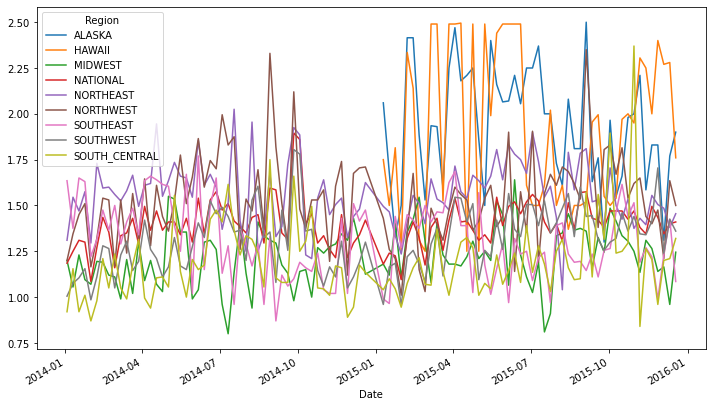

In [ ]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

In [ ]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

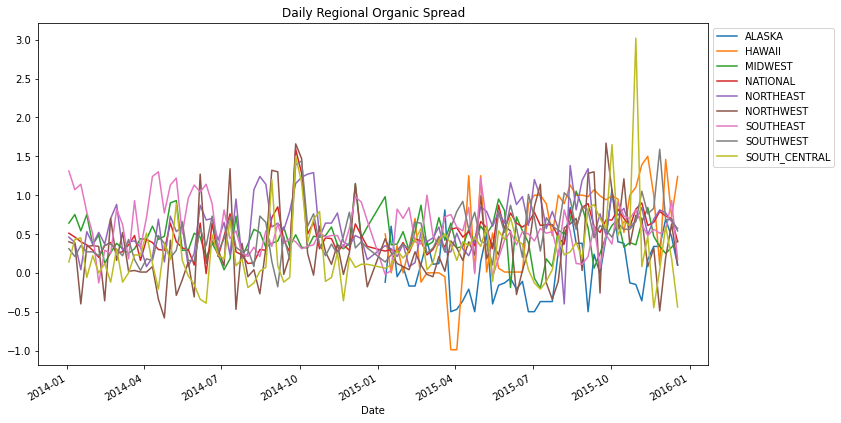

In [ ]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [ ]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


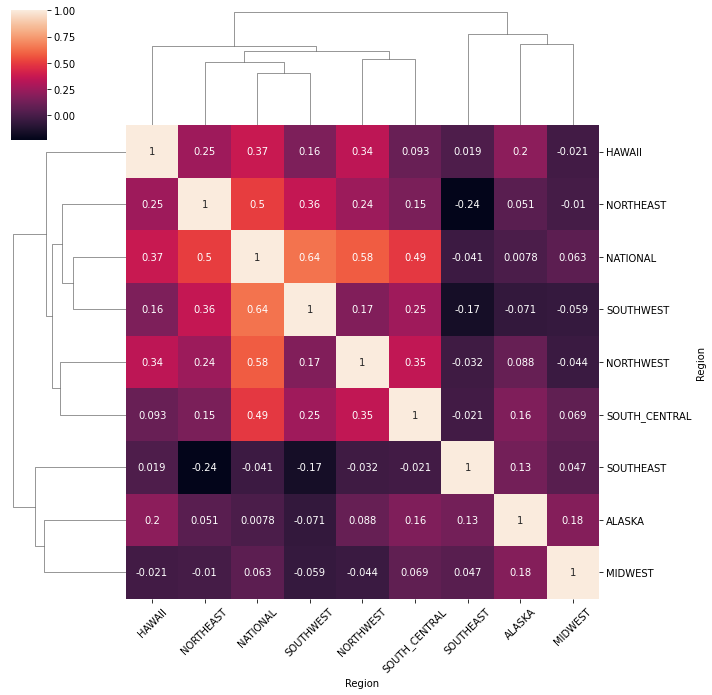

In [ ]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

**Ejercicio propuesto: Análisis de las lenguas nativas de Colombia por región**

In [ ]:
#1. extraccion de la data apartir de csv
import pandas as pd

dfLenguasNativas = pd.read_csv('/content/Mapa_Sonoro_-_Lenguas_Nativas_de_Colombia.csv')
dfLenguasNativas.set_index('Departamento')
dfLenguasNativas.head(10)

,Nombre de Lengua,Descripción de Lengua,Departamento,Familia Lingüística,Número de Habitantes,Número de Hablantes,Vitalidad
0,CUBEO,"""El pueblo indígena Cubeo se ubica en los depa...",VAUPÉS,TUKANO,6984,4210,Vulnerable
1,CUIBA,"""Los kuiba, se ubican en el extremo oriental d...",CASANARE,AISLADA,769,621,En peligro de extinción
2,YUHUP,NaN,VAUPÉS,MAKU,150,0,En peligro
3,SIRIANO,"""Están localizados en el Departamento del Vaup...",VAUPÉS,TUKANO,749,0,En peligro
4,ACHAGUA,"""El pueblo indígena Achagua fue uno de los pue...",META,ARAWAK,796,514,En peligro de extinción
5,WAUNANA,"""El Censo DANE 2005 reportó 9.066 personas que...",CHOCÓ,CHOCÓ,9066,8001,Vulnerable
6,EMBERA CHAMI,"""Los embera chamí son uno de los pueblos ember...",CHOCÓ,CHOCÓ,29094,11923,Vulnerable
7,GUAYABERO,"""El pueblo indígena conocido como Guayabero , ...",GUAVIARE,GUAHIBO,617,354,En peligro de extinción
8,WIWA,"""El pueblo Wiwa es uno de los pueblos indígena...",MAGDALENA,CHIBCHA,10703,6971,En peligro
9,TUKANO,"""Los Tukano habitan en Colombia y Brasil. En C...",VAUPÉS,TUKANO,2016,1460,Vulnerable


**Número de hablantes vs Número de habitantes**

<AxesSubplot:>

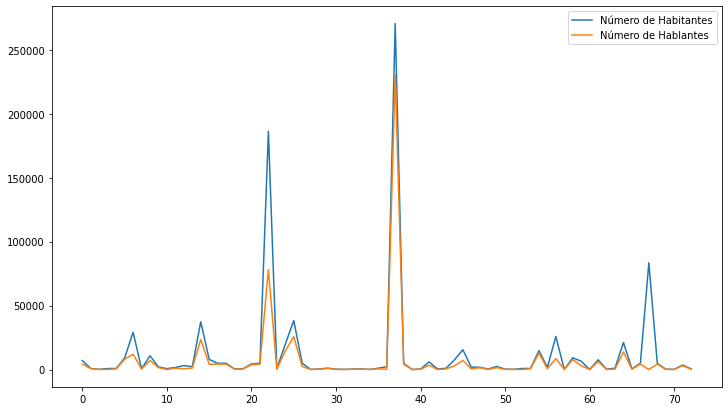

In [ ]:
import matplotlib.pyplot as plt

dfLenguasNativas.plot()

In [ ]:
dfLenguasNativas.dtypes

Nombre de Lengua         object
Descripción de Lengua    object
Departamento             object
Familia Lingüística      object
Número de Habitantes      int64
Número de Hablantes       int64
Vitalidad                object
dtype: object

**numero de hablantes de lenguas nativas en el departamento de VAUPÉS**

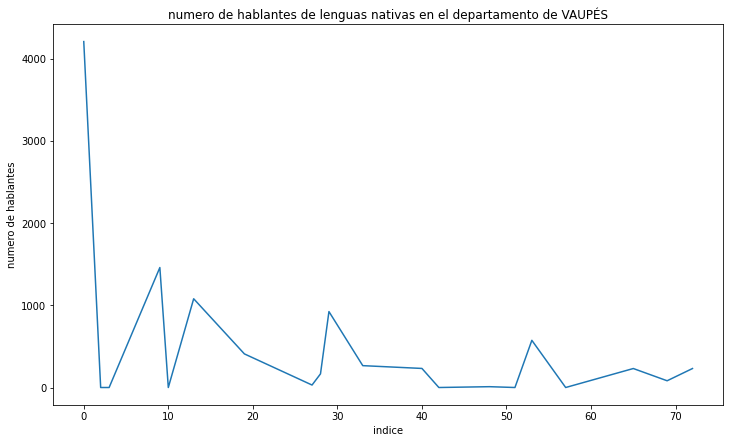

In [ ]:

VP = dfLenguasNativas[dfLenguasNativas.Departamento == 'VAUPÉS']
VP.groupby(['Familia Lingüística'])['Número de Hablantes'].ffill().plot();
plt.title("numero de hablantes de lenguas nativas en el departamento de VAUPÉS")
plt.ylabel("numero de hablantes")
plt.xlabel("indice");

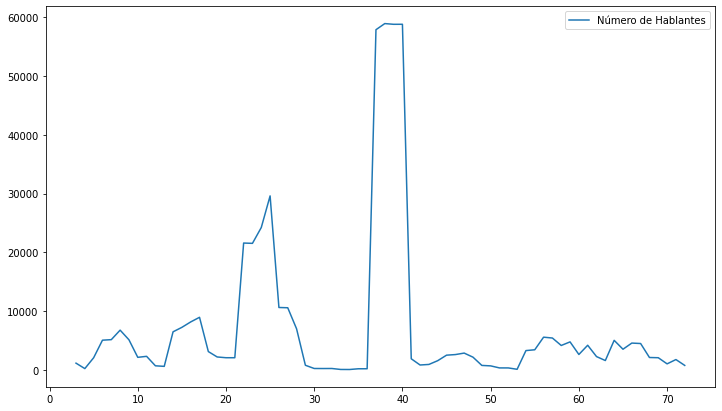

In [ ]:
dfLenguasNativas.rolling(4)[['Nombre de Lengua', 'Número de Hablantes']].mean().plot();

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!